In [1]:
#Importing necessary libraries
# data analysis/visualisation stack
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# statistics stack
from scipy import stats

# machine learning stack
#from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import silhouette_score

import warnings
warnings.simplefilter('ignore')


In [2]:
#Get the data which was exported from Dbeaver. It should have 21597 rows. 
df=pd.read_csv('data/king_county_house_details.csv', parse_dates=['date'])

Step 1: Investigation and Data cleaning

In [3]:
df.info()
#21 columns and 21596 rows. 
#column names do not have any problems. Date column's been converted while loading data.
#For further data cleaning and manipulation we need to look at the data more cloesly.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [4]:
#Thomas Hansen: 5 kids, no money, wants nice (social) neighborhood, Timing?, Location?
# 1. optimisation problem with the constrains on kids, budget and neighboorhood 
# 2. big house at least 3 bedrooms (2 for kids one for parents) in a social neighboorhood
# 3. to make it affordable we can look for old houses without renovation


In [5]:
df.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,...,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,...,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,...,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000


In [6]:
def print_unique_values(df, columns):
    for col in columns:
        unique_v = df[col].unique()
        print(f"{col} unique values: {unique_v}")
     

In [7]:
cols = ['grade', 'view', 'condition',  'floors', 'waterfront', 'yr_renovated']
print_unique_values(df, cols)

grade unique values: [ 7  6  8 11  9  5 10 12  4  3 13]
view unique values: [ 0. nan  3.  4.  2.  1.]
condition unique values: [3 5 4 1 2]
floors unique values: [1.  2.  1.5 3.  2.5 3.5]
waterfront unique values: [nan  0.  1.]
yr_renovated unique values: [    0. 19910.    nan 20020. 20100. 19920. 20130. 19940. 19780. 20050.
 20030. 19840. 19540. 20140. 20110. 19830. 19450. 19900. 19880. 19770.
 19810. 19950. 20000. 19990. 19980. 19700. 19890. 20040. 19860. 20070.
 19870. 20060. 19850. 20010. 19800. 19710. 19790. 19970. 19500. 19690.
 19480. 20090. 20150. 19740. 20080. 19680. 20120. 19630. 19510. 19620.
 19530. 19930. 19960. 19550. 19820. 19560. 19400. 19760. 19460. 19750.
 19640. 19730. 19570. 19590. 19600. 19670. 19650. 19340. 19720. 19440.
 19580.]


In [8]:
df[['yr_built', 'yr_renovated']].head() #year_renovated, waterfront and view are floats, should be converted int

,yr_built,yr_renovated
0,1955,0.000
1,1951,19910.000
2,1933,NaN
3,1965,0.000
4,1987,0.000


In [9]:

#the easiest way to converting to string and then taking first 4 digits
df['yr_renovated'] = (
    df['yr_renovated']
    .astype(str)          
    .str.extract(r'(\d{4})')  
    .astype('float').astype('Int64') 
)
df['view']=df['view'].astype('Int64') 
df['waterfront']=df['waterfront'].astype('Int64') 

In [10]:
#df.loc[df['view'] != 0, ['view']].head()

In [11]:
#df.loc[df['yr_renovated'] !=0 , ['yr_renovated']].head()

In [12]:
#df.loc[df['waterfront'] != 0, ['waterfront', 'waterfront1']].head()

Dealing with Null values

In [13]:
df.isna().sum()
#waterfront, view, sqft_basement, yr_renovated have nulls
#view, yr_renovated and waterfront can be filled with zeros as we can assume for these columns 
#if there is no value, it means that property has no view or waterfront and is not renovated.

id                   0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2391
view                63
condition            0
grade                0
sqft_above           0
sqft_basement      452
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
date                 0
price                0
dtype: int64

In [14]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['view'] = df['view'].fillna(0)
df['waterfront'] = df['waterfront'].fillna(0)

For the float and discrete or categorical columns we need to look at the central tendencies.

In [15]:
df.loc[df['sqft_basement']!=0, ['sqft_basement', 'sqft_living', 'sqft_lot']].head()


,sqft_basement,sqft_living,sqft_lot
1,400.000,2570.000,7242.000
3,910.000,1960.000,5000.000
5,1530.000,5420.000,101930.000
6,NaN,1715.000,6819.000
8,730.000,1780.000,7470.000


In [16]:
def get_mean_median_mode(df, columns):
    stats = {
        'median': df[columns].median().round(2),
        'mean': df[columns].mean().round(2),
        'mode': df[columns].mode().iloc[0].round(2)
    }
    return pd.DataFrame(stats)

In [17]:
cols = ['waterfront', 'sqft_basement', 'view']
result = get_mean_median_mode(df, cols)
print(result)

               median    mean  mode
waterfront      0.000   0.010 0.000
sqft_basement   0.000 291.860 0.000
view            0.000   0.230 0.000


In [18]:
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].mode().iloc[0])

In [19]:
df.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

House price should be calculated again as sqrfoot. We take only df['sqft_living']. 

In [20]:
df['price_sqft']=round(df['price']/df['sqft_living'], 2)
df['price_sqft'].head()

0   188.050
1   209.340
2   233.770
3   308.160
4   303.570
Name: price_sqft, dtype: float64

In [21]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

# First Hypothesis:  
### Price of old houses without renovation could be lower than the average house price when you control it for location.

In [22]:
last_built_year=df['yr_built'].max()
first_built_year=df['yr_built'].min()
print(f'Last built year in the data: {last_built_year}')
print(f'First built year in the data: {first_built_year}')

Last built year in the data: 2015
First built year in the data: 1900


In [23]:
#the latest built year is 2015. old is defined 20 years and older, so it is before 1995.
df['old'] = df['yr_built'].apply(lambda x: 'old' if x < 1995 else 'new')
df['old']

0        old
1        old
2        old
3        old
4        old
        ... 
21592    new
21593    new
21594    new
21595    new
21596    new
Name: old, Length: 21597, dtype: object

In [24]:
#renovated
df['renovated'] = df['yr_renovated'].apply(lambda x: 'renovated' if x !=0 else 'not renovated')
#df[['yr_renovated', 'renovated']]

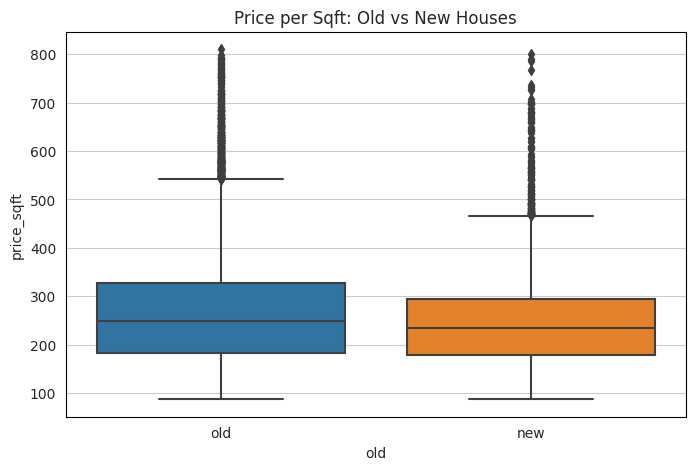

In [25]:
sns.boxplot(data=df, x='old', y='price_sqft')
plt.title("Price per Sqft: Old vs New Houses")
plt.savefig("boxplotfor_old_new.png", dpi=300, bbox_inches='tight')
plt.show()


In [26]:
a=round(df.groupby('renovated')['price_sqft'].mean(), 2)
print(f'Avg price_sqft for renovated and not renovated: {a}')
b=round(df.groupby('old')['price_sqft'].mean(), 2)
print(f'Avg price_sqft for old and new: {b}')

Avg price_sqft for renovated and not renovated: renovated
not renovated   262.100
renovated       321.340
Name: price_sqft, dtype: float64
Avg price_sqft for old and new: old
new   249.900
old   269.370
Name: price_sqft, dtype: float64


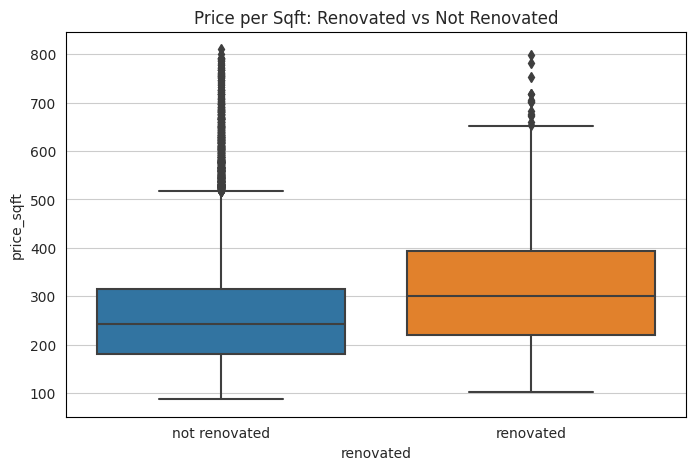

In [27]:
sns.boxplot(data=df, x='renovated', y='price_sqft')
plt.title("Price per Sqft: Renovated vs Not Renovated")
plt.savefig("boxplotfor_renstatus.png", dpi=300, bbox_inches='tight')
plt.show()


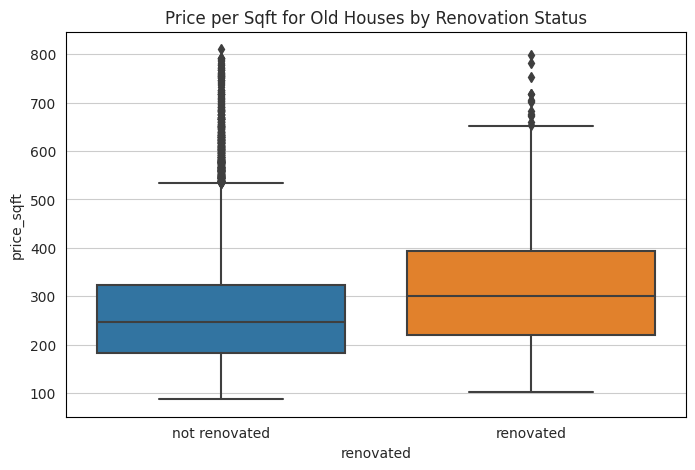

<Figure size 200x100 with 0 Axes>

In [28]:
df_old = df[df['old'] == 'old']

sns.boxplot(data=df_old, x='renovated', y='price_sqft')
plt.title("Price per Sqft for Old Houses by Renovation Status")
plt.figure(figsize=(2, 1)) 
plt.savefig("boxplotfor_old_renstatus.png", dpi=300, bbox_inches='tight')
plt.show()


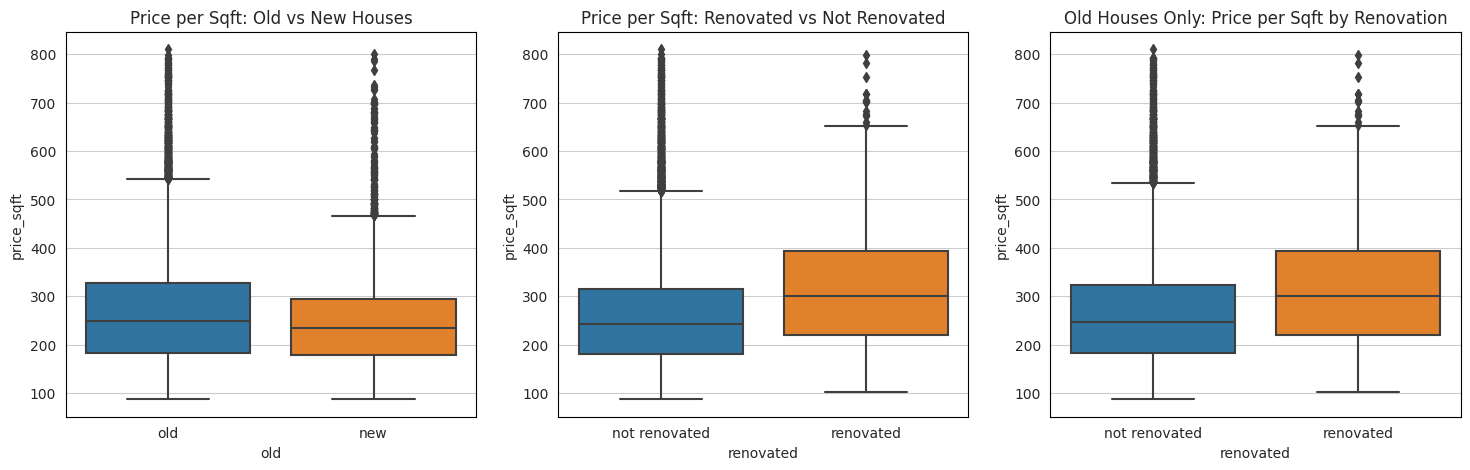

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# Price prsft for old vs new houses
sns.boxplot(data=df, x='old', y='price_sqft', ax=axes[0])
axes[0].set_title("Price per Sqft: Old vs New Houses")

# Price prsft by renovation status
sns.boxplot(data=df, x='renovated', y='price_sqft', ax=axes[1])
axes[1].set_title("Price per Sqft: Renovated vs Not Renovated")

# Price prsft for old houses by renovation status
df_old = df[df['old'] == 'old']
sns.boxplot(data=df_old, x='renovated', y='price_sqft', ax=axes[2])
axes[2].set_title("Old Houses Only: Price per Sqft by Renovation")
plt.savefig("boxplotfor_old_ren_andoldren.png", dpi=300, bbox_inches='tight')
#plt.tight_layout()

df.groupby('yr_built')['price_sqft'].mean().plot(figsize=(10,6), color='gray')
#plt.ylabel("Average Price")
plt.title("Average House Price by Year Built")
plt.show()


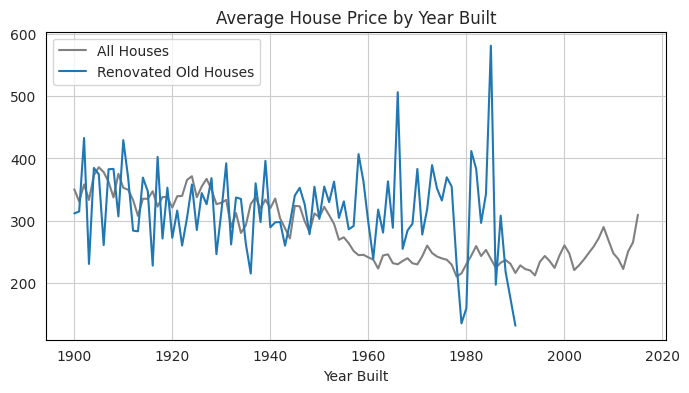

In [30]:
# Price by built year
df.groupby('yr_built')['price_sqft'].mean().plot(
    figsize=(8,4),
    color='gray',
    label='All Houses'
)

# Line 2 — renovated old houses only
df_old_renov = df[(df['old'] == 'old') & (df['renovated'] == 'renovated')]
df_old_renov.groupby('yr_built')['price_sqft'].mean().plot(
    label='Renovated Old Houses'
)

plt.title("Average House Price by Year Built")
plt.xlabel("Year Built")
# plt.ylabel("Average Price")  # uncomment if needed
plt.legend()
plt.savefig("avgprice_comp_oldhouses.png", dpi=300, bbox_inches='tight')
plt.show()



<Axes: xlabel='yr_built'>

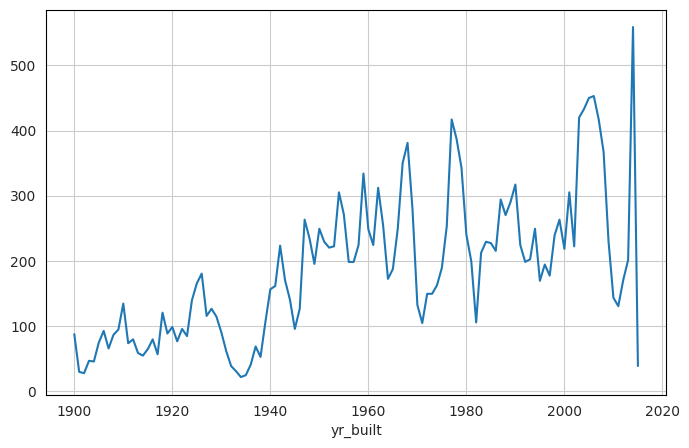

In [31]:
df['yr_built'].value_counts().sort_index().plot()

In [32]:

df[df['yr_built'] > 1994]['yr_built'].value_counts().sort_index()

yr_built
1995    169
1996    194
1997    177
1998    239
1999    263
2000    218
2001    305
2002    222
2003    420
2004    433
2005    450
2006    453
2007    417
2008    367
2009    230
2010    143
2011    130
2012    170
2013    201
2014    559
2015     38
Name: count, dtype: int64

In [33]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'price_sqft', 'old',
       'renovated'],
      dtype='object')

In [34]:
df['old_ren'] = ((df['old'] == 'old') & (df['renovated'] == 'renovated')).astype(int) #old and renovated houses
#df.old_ren.values

In [35]:
import statsmodels.api as sm
X = df[['old_ren', 'lat', 'long', 'bedrooms', 'bathrooms']]
X = sm.add_constant(X)

y = df['price_sqft']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             price_sqft   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     1788.
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:23:27   Log-Likelihood:            -1.2842e+05
No. Observations:               21597   AIC:                         2.568e+05
Df Residuals:                   21591   BIC:                         2.569e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.107e+04    579.769    -53.592      0.0

In [36]:
df['old_not_renov'] = ((df['old'] == 1) & (df['renovated'] == 0)).astype(int)

In [37]:
import statsmodels.api as sm
X = df[['old_not_renov', 'lat', 'long', 'bedrooms', 'bathrooms']]
X = sm.add_constant(X)

y = df['price_sqft']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             price_sqft   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     2172.
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:23:27   Log-Likelihood:            -1.2851e+05
No. Observations:               21597   AIC:                         2.570e+05
Df Residuals:                   21592   BIC:                         2.571e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.168e+04    580.441    -54.572

In [38]:
# P-value is zero so old not renovated houses have negative relationship with price psft.

In [39]:
numerical_features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot', 
    'floors',
    'yr_built',
    'yr_renovated',
    'price_sqft',
    'sqft_living15',
    'sqft_lot15',
    'condition',
    'grade'
]

categorical_features = [
    'waterfront',
    'view',
    'condition',
    'grade',
    'renovated'
]

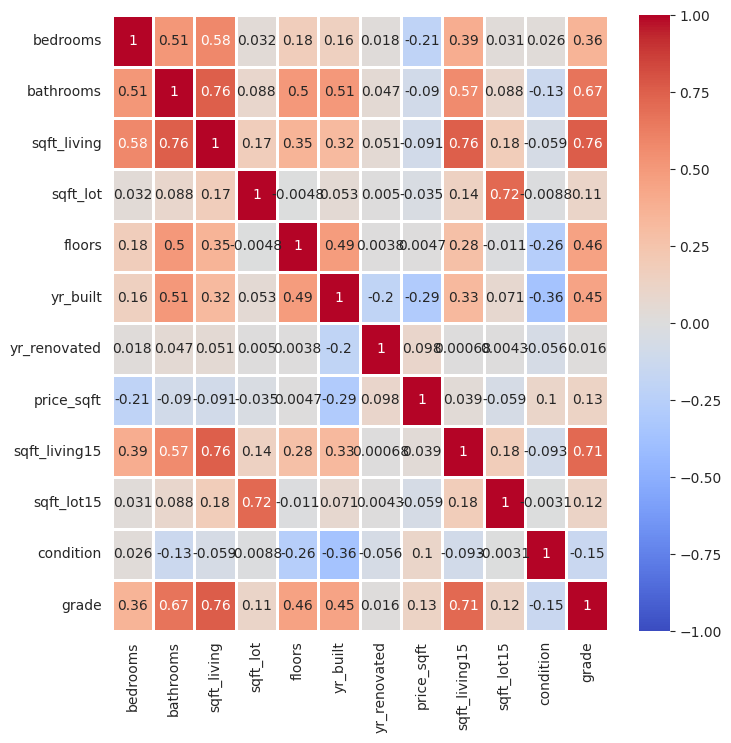

In [40]:
plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(
    data=df[numerical_features].corr(),
    cmap='coolwarm',
    linecolor='white',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
);

In [41]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'price_sqft', 'old',
       'renovated', 'old_ren', 'old_not_renov'],
      dtype='object')

In [42]:
numerical_cols_limited=['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                        'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
                        'price', 'price_sqft']

In [43]:
numerical_cols_limited

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'price',
 'price_sqft']

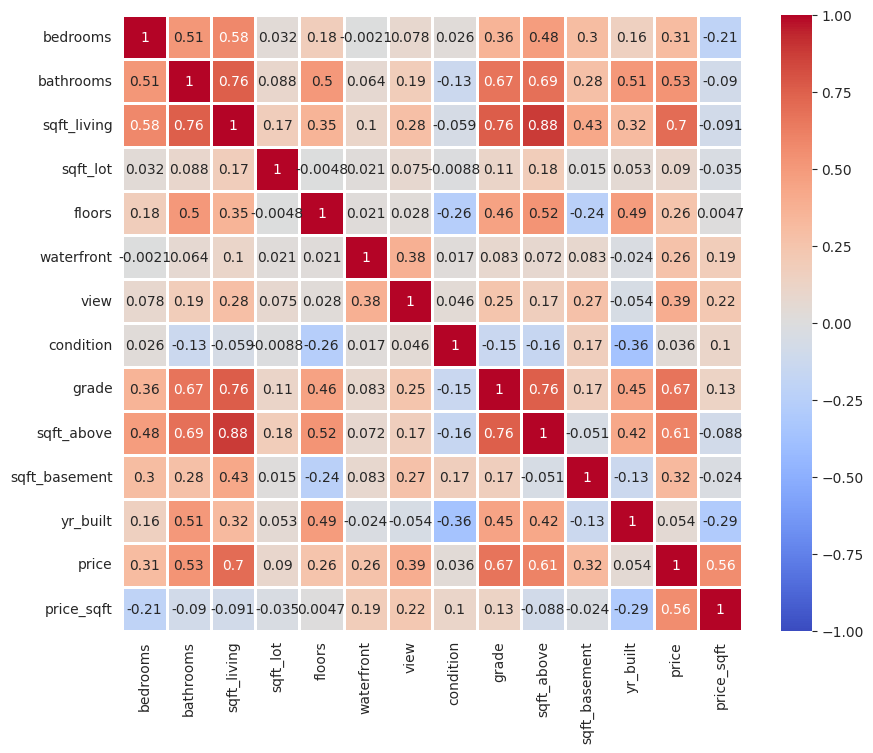

In [44]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(
    data=df[numerical_cols_limited].corr(),
    cmap='coolwarm',
    linecolor='white',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
);

Correlation among categorical features

In [45]:
def cat_cat_correlation(df_,cat_col1,cat_col2):
    """
    This function spits out Cramer's correlation statistic, with Bergsma-Wicher 
    correction, between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df_[cat_col1], df_[cat_col2])
    chi_sqr = stats.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

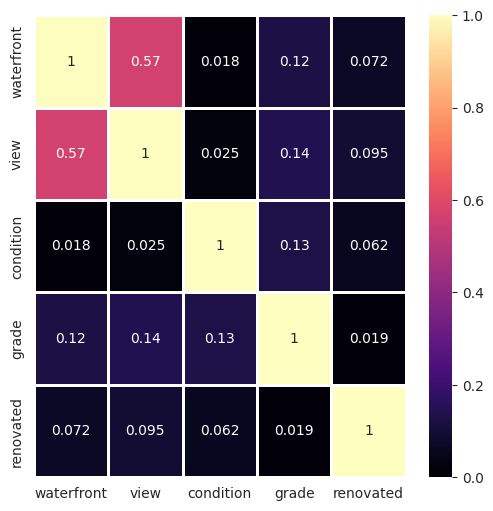

In [46]:


cramer_v_corr = dict(
    zip(
        categorical_features,
        [[cat_cat_correlation(df,f1,f2) for f2 in categorical_features] for f1 in categorical_features]
    )
)

plt.figure(figsize=(6,6),dpi=100)
sns.heatmap(data=pd.DataFrame(data=cramer_v_corr,index=categorical_features),
            cmap='magma',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=0,
            vmax=1
           );



In [47]:
import optbinning as op


def cat_num_correlation(df_,cat_col,num_col):
    """
    This function spits out a sensible correlation coefficient
    between a categorical column and a numerical column of a dataframe.
    The correlation is essentially the corrected Cramer's correlation statistic,
    after the numerical data points have been transformed under optimal binning
    """
    _df = df_.copy()
    class_number = _df[cat_col].nunique()
    binning = op.MulticlassOptimalBinning()
    _df['binned_feature'] =binning.fit_transform(_df[num_col], _df[cat_col])
    result = cat_cat_correlation(_df,cat_col,'binned_feature')
    return round(result,3)



In [48]:
corr_ren_pr=cat_num_correlation(df,'renovated','price_sqft')
corr_ren_pr


0.104

In [49]:
#df['grade']=df.grade.astype('str')
#df['condition']=df.condition.astype('str')

In [50]:
#corr_grad_pr=cat_num_correlation(df,'grade','price_sqft')
#corr_grad_pr

In [51]:
#corr_cond_pr=cat_num_correlation(df,'condition','price_sqft')
#corr_cond_pr

In [52]:
"""
corr_table = pd.DataFrame({
    'Category': ['Renovated', 'Grade', 'condition'],
    'Correlation_with_price_sqft': [
        corr_ren_pr,
        corr_grad_pr
     
    ]
})
"""

"\ncorr_table = pd.DataFrame({\n    'Category': ['Renovated', 'Grade', 'condition'],\n    'Correlation_with_price_sqft': [\n        corr_ren_pr,\n        corr_grad_pr\n\n    ]\n})\n"

In [53]:
#corr_table

In [54]:
#corr_cond_pr=cat_num_correlation(df,'condition','price_sqft')


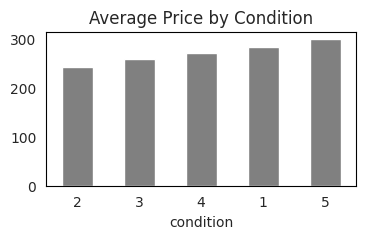

In [55]:
df.groupby('condition')['price_sqft'].mean().sort_values(ascending=True).plot(
    kind='bar', figsize=(4,2), color='gray')

plt.title("Average Price by Condition")
#plt.xlabel("Condition")
#plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [56]:
df.grade.unique() #This is an overall rating (from 1 to 13) of the housing unit based on 
#the King County grading system. This is a measure of the construction quality and design.
# 1-3: Falls short of minimum building standards or is an inferior structure.
#  7: Represents an average level of construction and design.
#   11-13: Indicates a high or superior quality level of construction and design 
#(e.g., luxury or mansion quality)

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

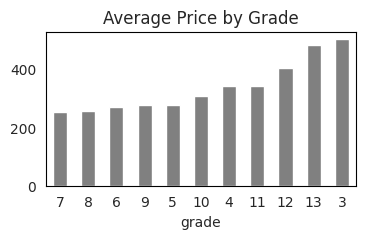

In [57]:
df.groupby('grade')['price_sqft'].mean().sort_values(ascending=True).plot(
   kind='bar', figsize=(4,2), color='gray')
plt.title("Average Price by Grade")
#plt.xlabel("Grade")
#plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [58]:
df[['grade', 'price_sqft']].corr()

,grade,price_sqft
grade,1.000,0.125
price_sqft,0.125,1.000


In [119]:
df[['condition', 'price_sqft']].corr()

,condition,price_sqft
condition,1.000,0.105
price_sqft,0.105,1.000


One expects that grade and price would have positive linear relationship.
However as the correlation coefficient also suggests that, there is a positive relationship but 
not very strong one. 

In [59]:
df['grade'].value_counts().sort_index()
#there is only one house with grade 3 and it is disturbing the distribution. So I will drop it.

grade
3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: count, dtype: int64

In [60]:
df.loc[df['grade']==3]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,price_sqft,old,renovated,old_ren,old_not_renov
3220,2420069251,1.000,0.750,520.000,12981.000,1.000,0,0,5,3,...,-121.995,1340.000,12233.000,2015-02-25,262000.000,503.850,old,not renovated,0,0


In [61]:
df_or = df.copy() #made a copy before dropping data

In [62]:
df['grade'].value_counts().sort_index()

grade
3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: count, dtype: int64

In [63]:
df['condition'].value_counts().sort_index()
#here we have very similar result with condition 1 (only 29(0.13% of data)). If we ignore the average of these
#very few houses condition and price also have positive linear relationship.
#as seen below, groups this small generally have higher variance which decrease its represantative power
#and distord the distribution. so we can drop these rows too.

condition
1       29
2      170
3    14020
4     5677
5     1701
Name: count, dtype: int64

In [64]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'price_sqft', 'old',
       'renovated', 'old_ren', 'old_not_renov'],
      dtype='object')

In [65]:
df[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'price_sqft']][df['condition'] ==1].head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,price_sqft
36,9435300030,4.000,1.000,1660.000,34848.000,0,0,1,5,331.330
380,1726059053,2.000,1.500,1380.000,209959.000,0,0,1,6,195.650
397,5175800060,4.000,2.000,1940.000,25600.000,0,0,1,8,188.140
1440,5694000710,3.000,1.000,1760.000,3000.000,0,0,1,6,200.540
1732,913000340,1.000,1.000,680.000,1638.000,0,4,1,6,370.590
2221,3886902445,2.000,1.000,920.000,9000.000,0,0,1,6,581.520
3002,9187200245,4.000,1.500,1100.000,3300.000,0,0,1,7,400.910
3199,723049596,2.000,1.000,810.000,7980.000,0,0,1,6,314.810
3971,6324000090,2.000,1.000,990.000,8140.000,0,0,1,6,212.120
4647,859000110,1.000,1.000,500.000,7440.000,0,0,1,5,250.000


In [66]:
df['price_sqft'].mean()

264.143331018197

In [120]:
df1=df[df['condition'] != 1] #filtering rows with condition=1

In [121]:
df[['condition', 'price_sqft']].corr()

,condition,price_sqft
condition,1.000,0.105
price_sqft,0.105,1.000


In [122]:
df1[['condition', 'price_sqft']].corr()

,condition,price_sqft
condition,1.000,0.105
price_sqft,0.105,1.000


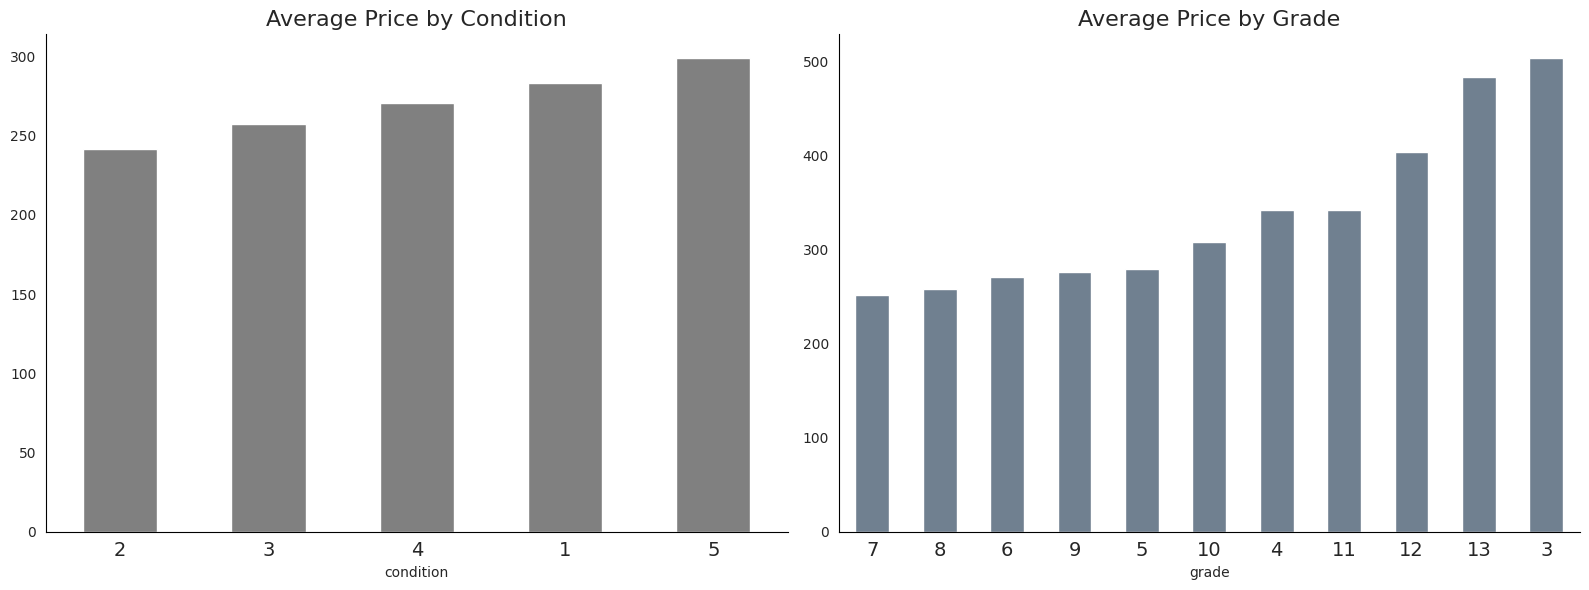

In [68]:
fig, ax=plt.subplots(1, 2, figsize=(16, 6))

df_or.groupby('condition')['price_sqft'].mean().sort_values(ascending=True).plot(
    kind='bar', color='gray', ax=ax[0])

ax[0].set_title("Average Price by Condition", size=16)
#plt.xlabel("Condition")
#plt.ylabel("Average Price")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, size=14)
ax[0].grid(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


df_or.groupby('grade')['price_sqft'].mean().sort_values(ascending=True).plot(
    kind='bar', color='slategrey', ax=ax[1])

ax[1].set_title("Average Price by Grade", size=16)
#plt.xlabel("Condition")
#plt.ylabel("Average Price")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0, size=14)
ax[1].grid(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("avgprice_condition_grade_or", dpi=300, bbox_inches='tight')
plt.show()

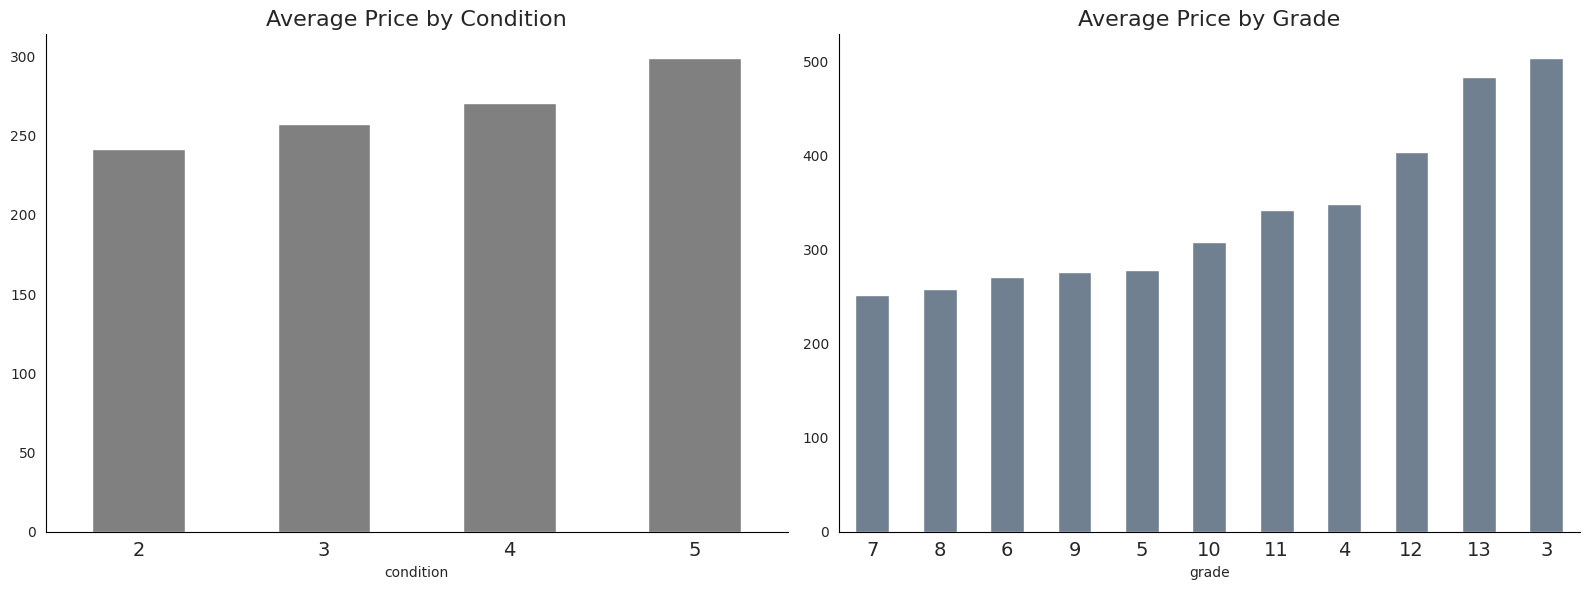

In [69]:
fig, ax=plt.subplots(1, 2, figsize=(16, 6))

df.groupby('condition')['price_sqft'].mean().sort_values(ascending=True).plot(
    kind='bar', color='gray', ax=ax[0])

ax[0].set_title("Average Price by Condition", size=16)
#plt.xlabel("Condition")
#plt.ylabel("Average Price")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, size=14)
ax[0].grid(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


df.groupby('grade')['price_sqft'].mean().sort_values(ascending=True).plot(
    kind='bar', color='slategray', ax=ax[1])

ax[1].set_title("Average Price by Grade", size=16)
#plt.xlabel("Condition")
#plt.ylabel("Average Price")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0, size=14)
ax[1].grid(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("avgprice_condition_grade", dpi=300, bbox_inches='tight')
plt.show()

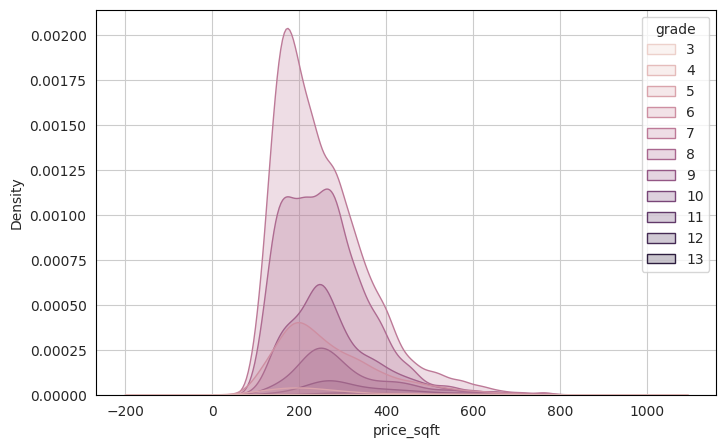

In [70]:
sns.kdeplot(data=df, x='price_sqft', hue='grade', fill= True);

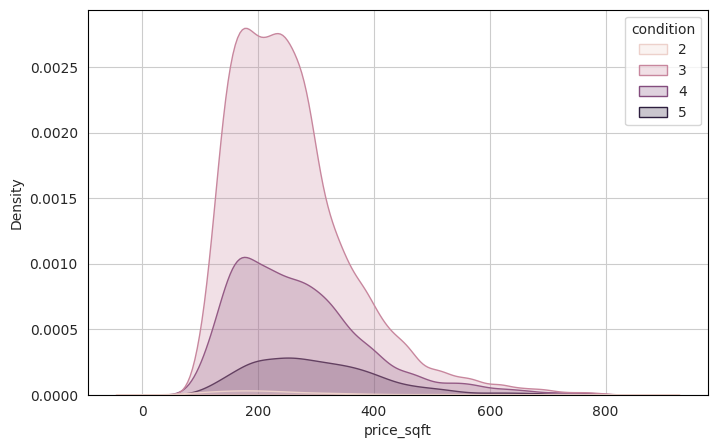

In [71]:
sns.kdeplot(data=df, x='price_sqft', hue='condition', fill= True);

In [72]:
def anova_pvalue(df_,cat_col,num_col):
    """
    This function spits out the anova p-value (probability of no correlation) 
    between a categorical column and a numerical column of a dataframe
    """
    category_group_lists = df_.groupby(cat_col)[num_col].apply(list)
    anova_results = stats.f_oneway(*category_group_lists)
    p_value = round(anova_results[1],3)
    return p_value


In [73]:
df['old_ren'] = ((df['old'] == 'old') & (df['renovated'] == 'renovated')).astype(int) #old and renovated houses


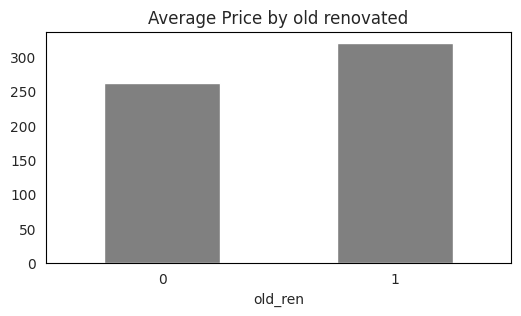

In [74]:
df.groupby('old_ren')['price_sqft'].mean().sort_values(ascending=True).plot(
    kind='bar', figsize=(6,3), color='gray')

plt.title("Average Price by old renovated")
#plt.xlabel("Grade")
#plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [75]:
# Need to test if this average differences statistically significant.

In [76]:
anova_old_ren_price=anova_pvalue(df,'old_ren','price_sqft')
print(f'p-value of Anova Test: {anova_old_ren_price}')
#they are likely to be correlated as we could not reject null hypothesis.
# We can Accept our 1st hypothesis that old, not renovated houses have lower average price
#Null of Anova: There is no difference among the group means.

p-value of Anova Test: 0.0


# Second Hypothesis and Geo Analysis to take into account location.

## Hypothesis: Houses in the city centre have higher avg price sqft.

We can create a heat map to see the average price differences in the city geographically. 

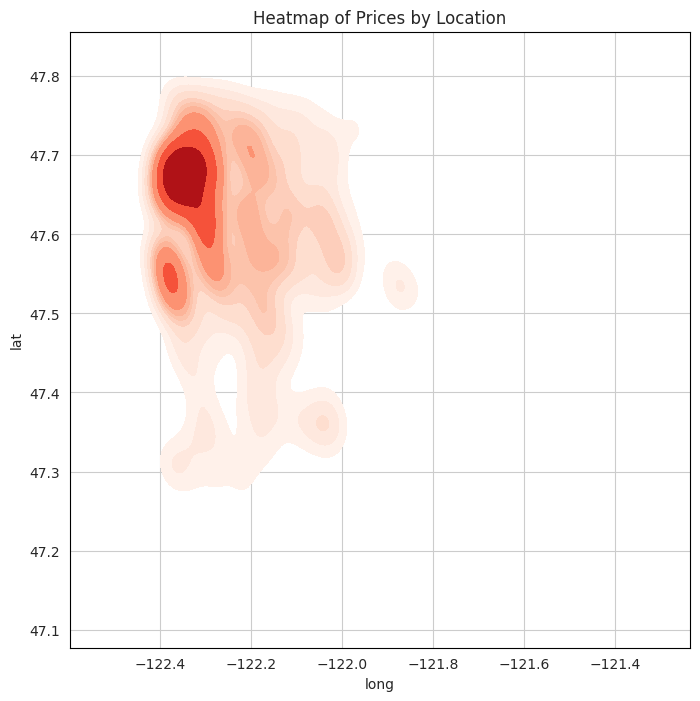

In [77]:
plt.figure(figsize=(8,8))
sns.kdeplot(x=df['long'], 
            y=df['lat'], 
            weights=df['price_sqft'], 
            cmap="Reds",
            fill=True,
            thresh=0.1)
plt.title("Heatmap of Prices by Location")
plt.show()

In [78]:
#gaussian_kde is a tool that estimates a smooth probability density surface over space.
#this helps us find where the high priced homes are located/clustered.
from scipy.stats import gaussian_kde

coords = np.vstack([df['long'], df['lat']]) #we will use these coordinates in gaussian_kde.
#and weight it with the price to get density.
weights = df['price_sqft'] 

kde = gaussian_kde(coords, weights=weights)

df['price_density'] = kde(coords) 
# as it uses density price_density based on coords answers how expensive is this area, 
#on average, considering nearby homes?

We can use this heat map to determine the city center and create an ordinal column saying 1 is the cheapest, most affordable housing, 5 most expensive.

In [79]:
df['location_price_rank'] = pd.qcut(
    df['price_density'],
    q=5,
    labels=[1, 2, 3, 4, 5]
)

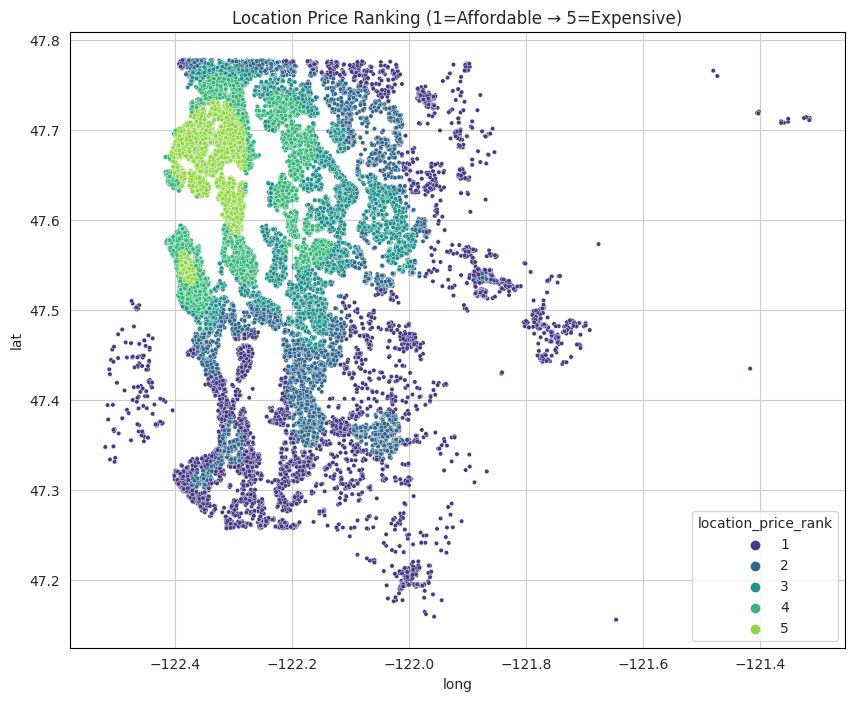

<Figure size 800x500 with 0 Axes>

In [80]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=df['long'], y=df['lat'],
    hue=df['location_price_rank'],
    palette='viridis',
    s=10
)
plt.title("Location Price Ranking (1=Affordable → 5=Expensive)")
plt.show()
plt.savefig("location_price_rankingheatmap.png", dpi=300, bbox_inches='tight')


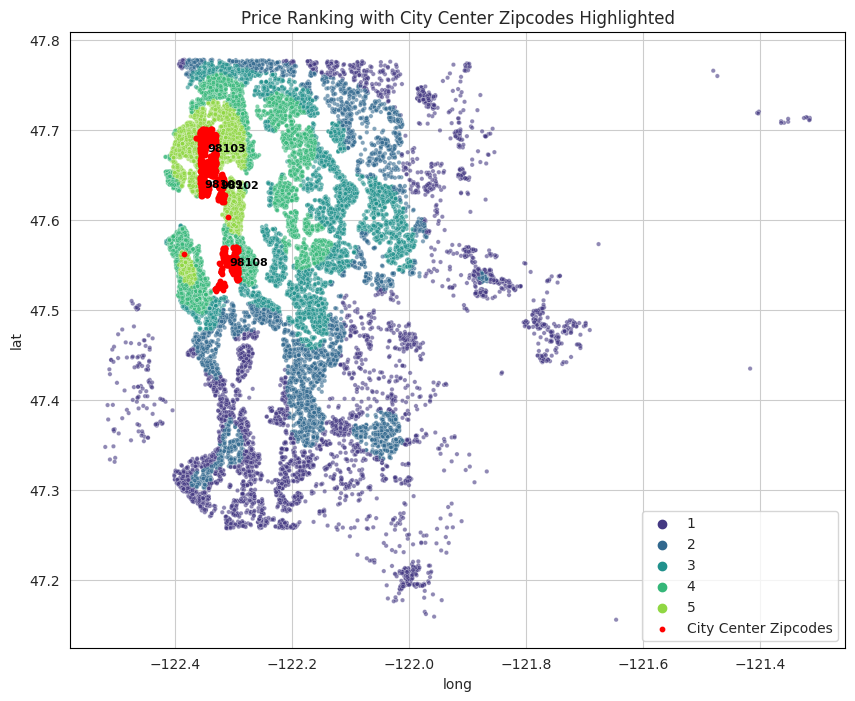

In [143]:
# city_center zipcodes
city_center = [98109, 98108, 98102, 98103]   

plt.figure(figsize=(10,8))

# Base scatterplot
sns.scatterplot(
    x=df['long'], 
    y=df['lat'],
    hue=df['location_price_rank'],
    palette='viridis',
    s=10,
    alpha=0.6
)

# Highlight city center
city_center_df = df[df['zipcode'].isin(city_center)]

plt.scatter(
    city_center_df['long'], city_center_df['lat'],
    color='red',
    s=10,
    label='City Center Zipcodes'
)

# Add zipcode labels (optional)
for z in city_center:
    subset = df[df['zipcode'] == z]
    plt.text(
        subset['long'].mean(),
        subset['lat'].mean(),
        str(z),
        fontsize=8,
        color='black',
        weight='bold'
    )

plt.legend()
plt.title("Price Ranking with City Center Zipcodes Highlighted")
plt.savefig("citycenter.png", dpi=300, bbox_inches='tight')
plt.show()


In [82]:
df['city_center'] = (df['location_price_rank'] == 5).astype(int)

In [83]:
df['city_center_zips'] = df['zipcode'].isin(city_center).astype(int)

In [84]:
df[['city_center_zips', 'price_sqft']].corr() #pozitif relationship but not as strong as we expected. The reason for this is that some city center zipcodes are 
#not in the data set.

,city_center_zips,price_sqft
city_center_zips,1.000,0.183
price_sqft,0.183,1.000


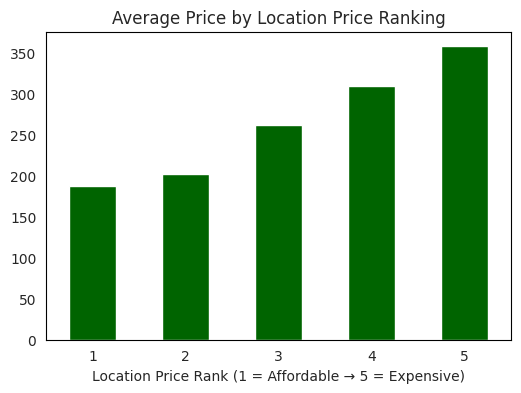

In [85]:
df.groupby('location_price_rank')['price_sqft'].mean().plot(
    kind='bar',
    figsize=(6,4),
    color='darkgreen'
)

plt.title("Average Price by Location Price Ranking")
plt.xlabel("Location Price Rank (1 = Affordable → 5 = Expensive)")
#plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


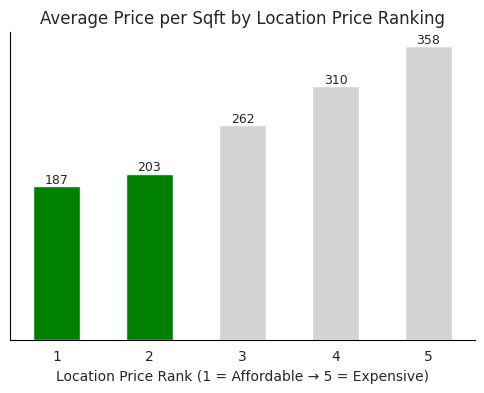

In [86]:
# Bar chart Average sqftprice for each location group

avg_values = df.groupby('location_price_rank')['price_sqft'].mean()

# custom colors: first two green, rest gray
colors = ['green' if i < 2 else 'lightgray' for i in range(len(avg_values))]

# Plot
fig, ax = plt.subplots(figsize=(6,4))
avg_values.plot(kind='bar', color=colors, ax=ax)

# ---- Remove borders (spines) ----
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove y-axis ticks 
ax.set_yticks([])

# Data labels on top of bars 
for i, v in enumerate(avg_values):
    ax.text(i, v, f"{v:.0f}", ha='center', va='bottom', fontsize=9)

plt.title("Average Price per Sqft by Location Price Ranking")
plt.xlabel("Location Price Rank (1 = Affordable → 5 = Expensive)")
plt.xticks(rotation=0)
plt.grid(False)
plt.savefig("avgprice_loc_barchart.png", dpi=300, bbox_inches='tight')
plt.show()



In [87]:
anova_loc_price=anova_pvalue(df,'location_price_rank', 'price_sqft')
print(f'p-value of Anova Test: {anova_loc_price}')
#they are likely to be correlated as we could not reject null hypothesis.
# We can Accept our 1st hypothesis that old, not renovated houses have lower average price
#Null of Anova: There is no difference among the group means.


p-value of Anova Test: 0.0


In [88]:
round(df[['location_price_rank', 'price_sqft']].corr(), 2) #we have high correlation as expected.
#unexpected high average price for given grade and condition levels also reflect the impact of other factors on price of 
#a property such as location.

,location_price_rank,price_sqft
location_price_rank,1.000,0.580
price_sqft,0.580,1.000


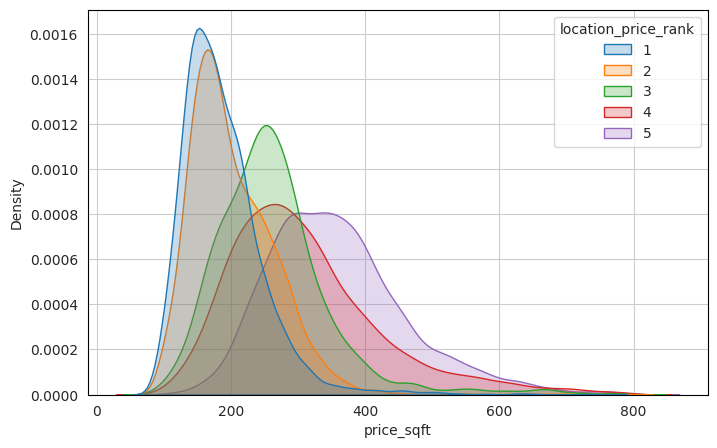

In [89]:
sns.kdeplot(data=df, x='price_sqft', hue='location_price_rank', fill= True);

Third Hypothesis: Bigger the size of the house higher the price.
From the heat map the size of the house does not seem to be correlated to the price strongly.
Now we have location based categorical (numerical but, ordinal) column. Lets update column names:


In [90]:
df[['sqft_living', 'price_sqft']].corr()
#as it is a city and location and other factors can become more important 
#bigger houses tend to be located outside city center where avg prices are lower. 
#So we have negative relationship btw number of rooms and size of the house with price per sqft.
#we can test it if location and beddroom number has correlation. 

,sqft_living,price_sqft
sqft_living,1.000,-0.091
price_sqft,-0.091,1.000


In [91]:
numerical_features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot', 
    'floors',
    'yr_built',
    'yr_renovated',
    'price_sqft',
    'sqft_living15',
    'sqft_lot15',
    'location_price_rank'
]

categorical_features = [
    'waterfront',
    'view',
    'condition',
    'grade',
    'renovated',
    'location_price_rank'
]

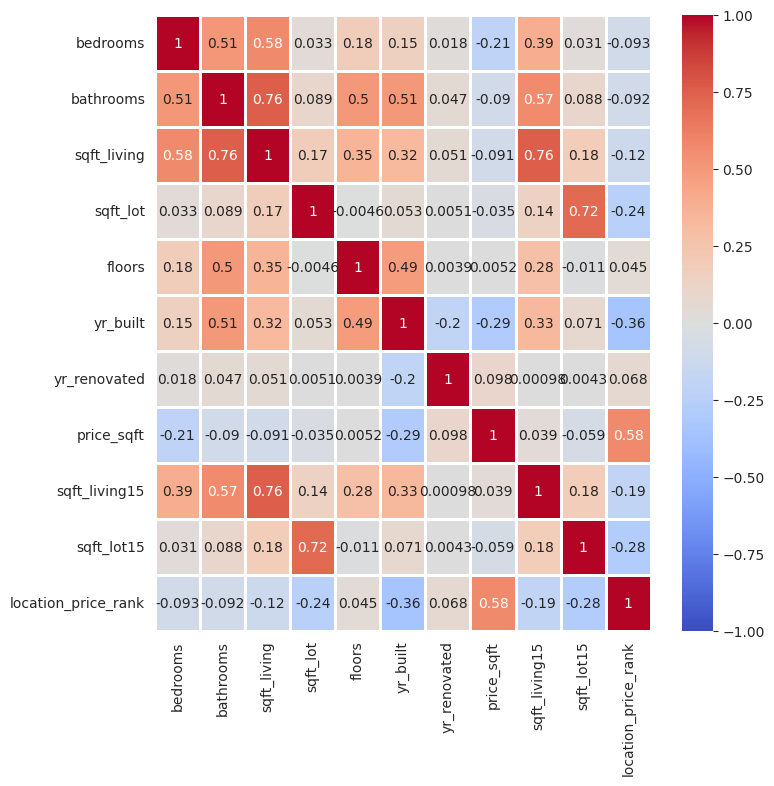

In [92]:
plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(
    data=df[numerical_features].corr(),
    cmap='coolwarm',
    linecolor='white',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
);

In [93]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'price_sqft', 'old',
       'renovated', 'old_ren', 'old_not_renov', 'price_density',
       'location_price_rank', 'city_center', 'city_center_zips'],
      dtype='object')

Size related columns: 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement'. I'll focus on 'sqft_living' as other size related features are higly correlated.

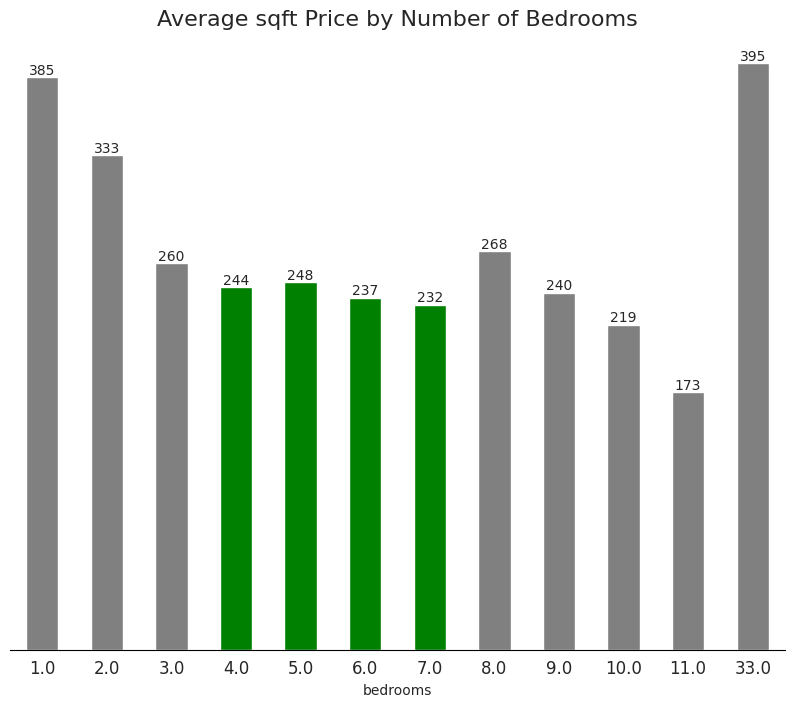

In [139]:
# Bar chart Average sqr price for number of bedrooms

avg_values = df.groupby('bedrooms')['price_sqft'].mean()

# Create custom colors: first two green, rest gray
colors = ['green' if i >2 and i<7  else 'gray' for i in range(len(avg_values))]

# Plot
fig, ax = plt.subplots(figsize=(10,8))
avg_values.plot(kind='bar', color=colors, ax=ax)

# ---- Remove borders (spines) ----
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# ---- Remove y-axis ticks ----
ax.set_yticks([])

# ---- Data labels on top of bars ----
for i, v in enumerate(avg_values):
    ax.text(i, v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Average sqft Price by Number of Bedrooms", size=16)
#plt.xlabel("Number of bedrooms")
plt.xticks(rotation=0, size=12)
plt.grid(False)
plt.savefig("avgprice_bedrooms_barchart.png", dpi=300, bbox_inches='tight')
plt.show()


In [95]:
anova_living_price=anova_pvalue(df,'bedrooms', 'price_sqft')
print(f'p-value of Anova Test: {anova_living_price}')
#they are likely to be correlated as we could not reject null hypothesis.
# We can Accept our 1st hypothesis that old, not renovated houses have lower average price
#Null of Anova: There is no difference among the group means.


p-value of Anova Test: 0.0


In [96]:
df[['bedrooms', 'price']].corr() #as expected 

,bedrooms,price
bedrooms,1.000,0.309
price,0.309,1.000


In [97]:
df[['bedrooms', 'price_sqft']].corr()
#as it is a city and location and other factors can become more important 
#bigger houses tend to be located outside city center where avg prices are lower. 
#So we have negative relationship btw number of rooms and size of the house with price per sqft.
#we can test it if location and beddroom number has correlation. 

,bedrooms,price_sqft
bedrooms,1.000,-0.206
price_sqft,-0.206,1.000


In [98]:
df[['bedrooms', 'location_price_rank']].corr()

,bedrooms,location_price_rank
bedrooms,1.000,-0.093
location_price_rank,-0.093,1.000


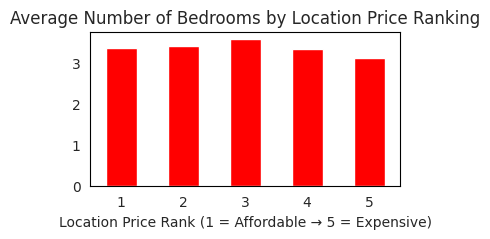

In [99]:
df.groupby('location_price_rank')['bedrooms'].mean().plot(
    kind='bar',
    figsize=(4,2),
    color='red'
)

plt.title("Average Number of Bedrooms by Location Price Ranking")
plt.xlabel("Location Price Rank (1 = Affordable → 5 = Expensive)")
#plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


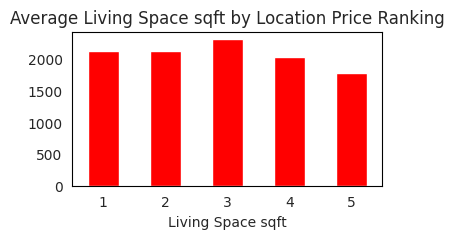

In [100]:
df.groupby('location_price_rank')['sqft_living'].mean().plot(
    kind='bar',
    figsize=(4,2),
    color='red'
)

plt.title("Average Living Space sqft by Location Price Ranking")
plt.xlabel("Living Space sqft")
#plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

People tend to move in spring or summer. So going for house hunt in winter can increase the chance to find a house with a reasonable price.
Houses listed in winter (Dec–Feb) have significantly lower average prices per square foot than houses listed in spring and summer (Mar–Aug).

In [101]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['quarter'] = df['date'].dt.quarter
df['month_name'] = df['date'].dt.strftime('%b') 
df['weekofyear'] = df['date'].dt.isocalendar().week
df['year_month'] = df['date'].dt.to_period('M')  


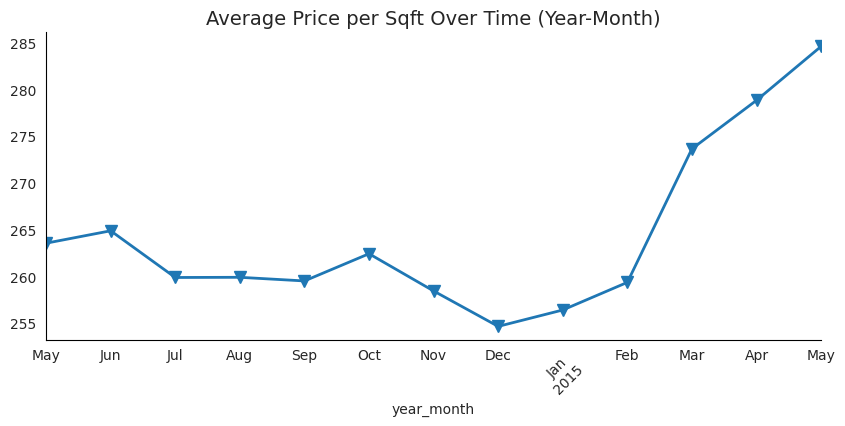

In [102]:
df_ym = df.groupby('year_month')['price_sqft'].mean()

ax = df_ym.plot(figsize=(10,4), marker='v', linewidth=2, markersize=8)

plt.title("Average Price per Sqft Over Time (Year-Month)", size=14)
plt.xticks(rotation=45)
plt.grid(False)

# Remove borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)  # optional

plt.savefig("AvgPriceOverTime.png", dpi=300, bbox_inches='tight')
plt.show()


# Third hypothesis:

## People tend to move in spring or summer. So going for house hunt in winter can increase the chance to find a house with a lower price than other seasons.
We have only one year data which does not allow to get definitive seasonal patterns. However, winter months (especially December–February) show lower average prices psft compared to spring months.
This suggests that winter may offer better buying opportunities. As stated, due to data limitations, this recommendation should be interpreted as an indication.

In [103]:
seasons = {
    12: "Winter",
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Fall",
    10: "Fall",
    11: "Fall"
}

df['season_name'] = df['date'].dt.month.map(seasons)


In [104]:
#df['season'] = df['date'].dt.month % 12 // 3 next time use this

In [105]:
df[['month', 'season_name']].head()

,month,season_name
0,10,Fall
1,12,Winter
2,2,Winter
3,12,Winter
4,2,Winter


In [106]:
seasonal_avg_price_psft=pd.DataFrame(round(df.groupby('season_name')['price_sqft'].mean(), 2))

In [107]:
seasonal_avg_price_psft

,price_sqft
season_name,
Fall,260.280
Spring,273.750
Summer,261.590
Winter,256.700


In [108]:
 # or map {'new':0, 'old':1}
df['old1'] = df['old'].map({'old': 1, 'new': 0})
df['renovated1'] = df['renovated'].map({'renovated': 1, 'not renovated': 0})


In [109]:
df['location_price_rank1'] = df['location_price_rank'].astype(int)

In [110]:
df['age'] = 2025 - df['yr_built']

In [111]:
df['age2'] = df['age'] ** 2 #to include possible nonlinear relationship 


In [112]:
df.info() #check any dtype problem. All must be int or float.

<class 'pandas.core.frame.DataFrame'>
Index: 21568 entries, 0 to 21596
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    21568 non-null  int64         
 1   bedrooms              21568 non-null  float64       
 2   bathrooms             21568 non-null  float64       
 3   sqft_living           21568 non-null  float64       
 4   sqft_lot              21568 non-null  float64       
 5   floors                21568 non-null  float64       
 6   waterfront            21568 non-null  Int64         
 7   view                  21568 non-null  Int64         
 8   condition             21568 non-null  int64         
 9   grade                 21568 non-null  int64         
 10  sqft_above            21568 non-null  float64       
 11  sqft_basement         21568 non-null  float64       
 12  yr_built              21568 non-null  int64         
 13  yr_renovated         

In [144]:
features = ['bathrooms','bedrooms','grade','condition',
    'waterfront','view','age','age2', 'renovated1',
    'lat','long', 'month'
]

X = df[features].astype(float)
y = df['price_sqft'].astype(float)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             price_sqft   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     1408.
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:27:20   Log-Likelihood:            -1.2572e+05
No. Observations:               21568   AIC:                         2.515e+05
Df Residuals:                   21555   BIC:                         2.516e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.221e+04    559.368    -39.704      0.0

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

features = [
    'bathrooms', 'bedrooms', 'grade', 'condition',
    'waterfront', 'view', 'renovated1',
    'age', 'age2', 'lat', 'long'
]

X = df[features].astype(float)

# Add constant for stability
X_vif = sm.add_constant(X)

vif_df = pd.DataFrame()
vif_df['Variable'] = X_vif.columns
vif_df['VIF'] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_df


,Variable,VIF
0,const,996166.937
1,bathrooms,2.656
2,bedrooms,1.447
3,grade,2.017
4,condition,1.259
5,waterfront,1.173
6,view,1.314
7,renovated1,1.115
8,age,21.998
9,age2,18.545


VIF < 5 → No multicollinearity concerns

VIF 5–10 → Moderate, acceptable

VIF > 10 → Strong multicollinearity

Dependent Variable: price_sqft

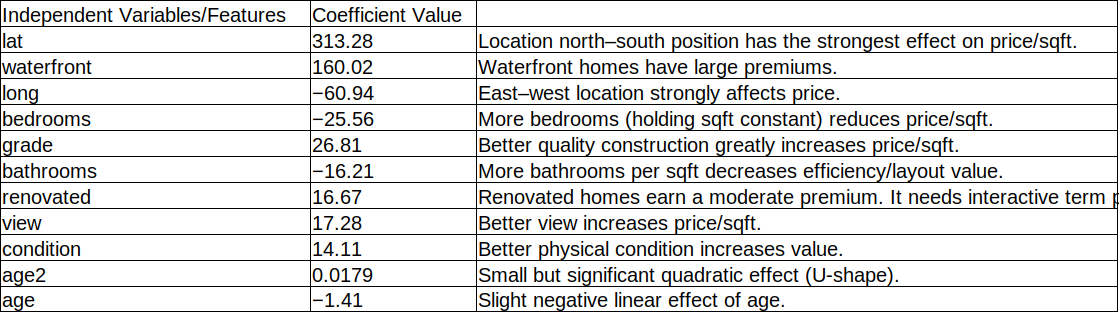![image.png](attachment:8777932c-5332-41cf-9430-29c82faa70f3.png)

In [115]:
df.groupby('zipcode')['price_sqft'].mean().sort_values().head(10)

zipcode
98023   148.866
98002   151.174
98001   151.348
98032   154.220
98030   155.156
98092   155.814
98003   157.113
98031   161.102
98042   164.378
98188   169.007
Name: price_sqft, dtype: float64

In [116]:
cheapest_10_zipcodes = (
    df.groupby('zipcode')['price_sqft']
      .mean()
      .sort_values()
      .head(10)
      .index
      .tolist()
)

cheapest_10_zipcodes


[98023, 98002, 98001, 98032, 98030, 98092, 98003, 98031, 98042, 98188]

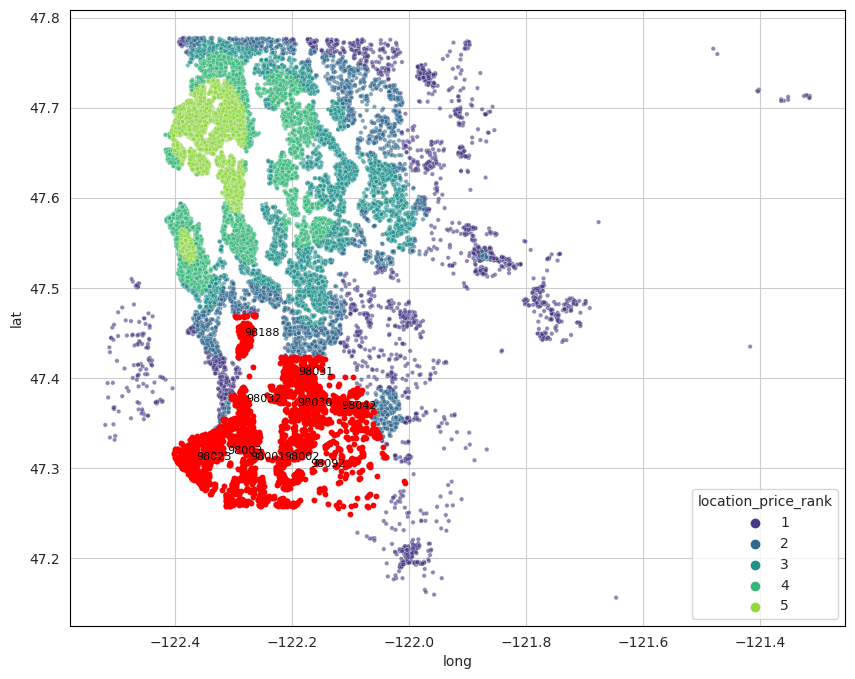

In [117]:
# Get cheapest zipcodes
cheapest_10 = (
    df.groupby('zipcode')['price_sqft']
      .mean()
      .sort_values()
      .head(10)
      .index
      .tolist()
)

plt.figure(figsize=(10,8))

# Base scatterplot
sns.scatterplot(
    x=df['long'], 
    y=df['lat'],
    hue=df['location_price_rank'],
    palette='viridis',
    s=10,
    alpha=0.6
)

# Highlight cheapest zipcodes
cheap_df = df[df['zipcode'].isin(cheapest_10)]

plt.scatter(
    cheap_df['long'], cheap_df['lat'],
    color='red',
    s=10,
    label='Cheapest Zipcodes'
)

# Add zipcode labels (optional)
for z in cheapest_10:
    subset = df[df['zipcode'] == z]
    plt.text(
        subset['long'].mean(),
        subset['lat'].mean(),
        str(z),
        fontsize=8,
        color='black'
    )


plt.savefig("cheapestzipcodes.png", dpi=300, bbox_inches='tight')


In [118]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'price_sqft', 'old',
       'renovated', 'old_ren', 'old_not_renov', 'price_density',
       'location_price_rank', 'city_center', 'city_center_zips', 'year',
       'month', 'day', 'quarter', 'month_name', 'weekofyear', 'year_month',
       'season_name', 'old1', 'renovated1', 'location_price_rank1', 'age',
       'age2'],
      dtype='object')

Newer construction tends to be in suburbs(cheaper land)
p-value = 0.116, age2 is not statistically significant, so there is no evidence of curvature in the relationship. 
So the age effect is mostly linear in the controlled model.


“After controlling for property size, quality, renovation status, and location, older homes appear to have higher prices. This effect is largely linear and is explained by the fact that older homes in the dataset tend to be located in desirable, central, or historically valuable neighborhoods. The quadratic age term was not statistically significant, indicating no strong nonlinear relationship between age and price.”